In [62]:
from sklearn.manifold import TSNE
import os
import numpy as np
import seaborn as sns
import csv
import matplotlib.pyplot as plt

In [63]:
# Load feature data. 
latent_folder = 'data/lfn_feats'

# Load all features.
feats = []
objs = []
 
for fname in os.listdir(latent_folder):
    
    # Load feature. 
    path = os.path.join(latent_folder, fname)
    feat = feats.append(np.load(path))
    
    # Keep object id. 
    objs.append(fname.split('.')[0])

In [64]:
## Get labels for plot. 
from nltk.corpus import wordnet as wn
 
# Load all metadata for objects. 
with open('data/metadata.csv', 'r') as csvfile: 
    metadata = [row for row in csv.reader(csvfile)]
    
# Get index of each object in metdata. 
obj2synset = {m[0].replace('wss.', '').strip(): m[2].strip() for m in metadata}
    
# Load synset word mappings. 
with open('data/categories.synset.csv', 'r') as csvfile: 
    mappings = [row for row in csv.reader(csvfile)]
    
    # Mapping from synset to word. 
    s2w = {r[2].strip(): r[3].split(',')[0].strip() for r in mappings[1:]}    


# Get set of all synsets. 
synset_codes = set([r[2].strip() for r in metadata[2:]])    
synsets = []

for s in synset_codes: 
    try: 
        synset = s2w[s]
    except: 
        synset = 'None'
        
    synsets.append(synset)

In [65]:
from collections import Counter

## Get 10 most common object categories and filter out everything else.  
snare_synsets = []
counts = Counter()

# Count object categories. 
for obj in objs:
    synset = obj2synset[obj]

    # Only count those with label. 
    if synset in s2w:
        word = s2w[synset]
        snare_synsets.append(word)
        
        # Update word count.
        if not word == '': 
            counts[word] += 1
    else: 
        snare_synsets.append(None)

# Get 10 most common categories. 
top10 = {t[0]: t[1] for t in counts.most_common(10)}

# Only keep objects in top-10 categories. 
final_feats = []
final_labels = []

assert len(objs) == len(feats) and len(objs) == len(snare_synsets)

for i in range(len(objs)):
    synset = snare_synsets[i]
    
    if synset in top10: 
        final_feats.append(feats[i])
        final_labels.append(synset)
        
# Create numpy array of features. 
final_feats = np.stack(final_feats)
print(final_feats.shape)

(2273, 256)


In [66]:
# Compute TSNE features. 
tsne_feats = TSNE().fit_transform(final_feats)
print(tsne_feats.shape)

(2273, 2)


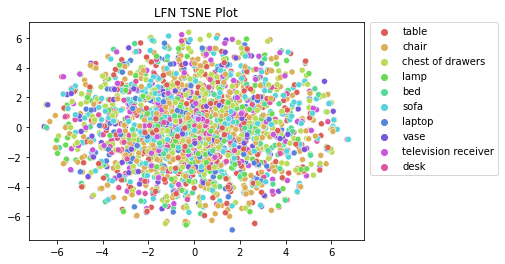

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the TSNE embeddings. 
sns.scatterplot(x=tsne_feats[:,0], y=tsne_feats[:,1], hue=final_labels, palette=sns.color_palette("hls", 10)).set(title='LFN TSNE Plot')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)